# Import the Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

# Data Cleaning and First five Rows

In [2]:
df_ = pd.read_csv('Pokemon.csv')
Names = df_.iloc[:,1].values
df = df_.drop(['Name','#'], axis=1)
df = df.set_index(Names)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Shape of the data

In [3]:
print(f"The data has: {df.shape[0]:4}  Rows, And: {df.shape[1]:3}  Columns")

The data has:  800  Rows, And:  11  Columns


# Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 69.5+ KB


# Scatter Plot: Attack VS Defense

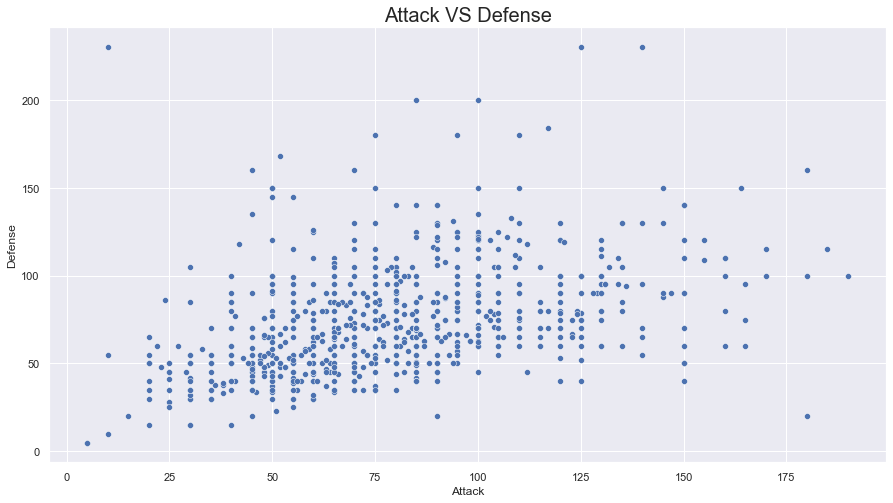

In [5]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df["Attack"], y=df["Defense"])
plt.title("Attack VS Defense", size=20)
plt.show()

# Best Pokemon: Attack with High Defense (Over 200)

In [6]:
df = df.sort_values("Attack", ascending=False)
df[df["Defense"] > 200]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


# Scatter Plot: Defense VS HP

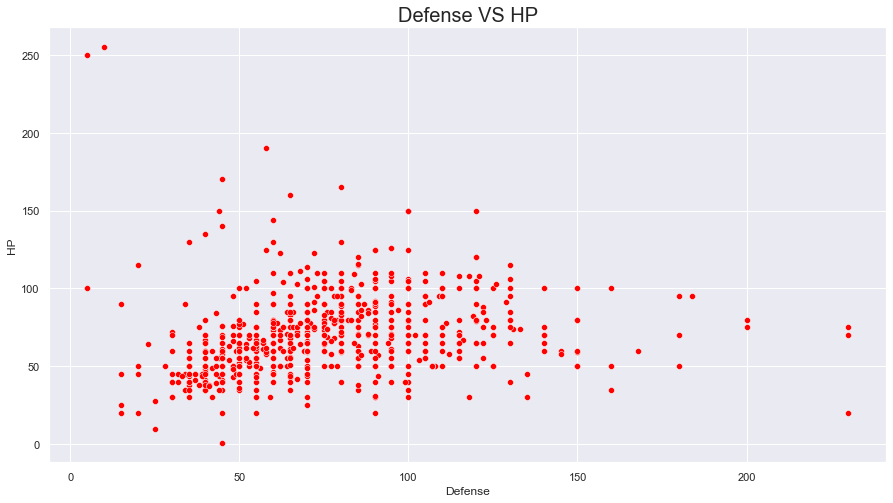

In [7]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df["Defense"], y=df["HP"], color='red')
plt.title("Defense VS HP", size=20)
plt.show()

# Box Plot on the sum of (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed)

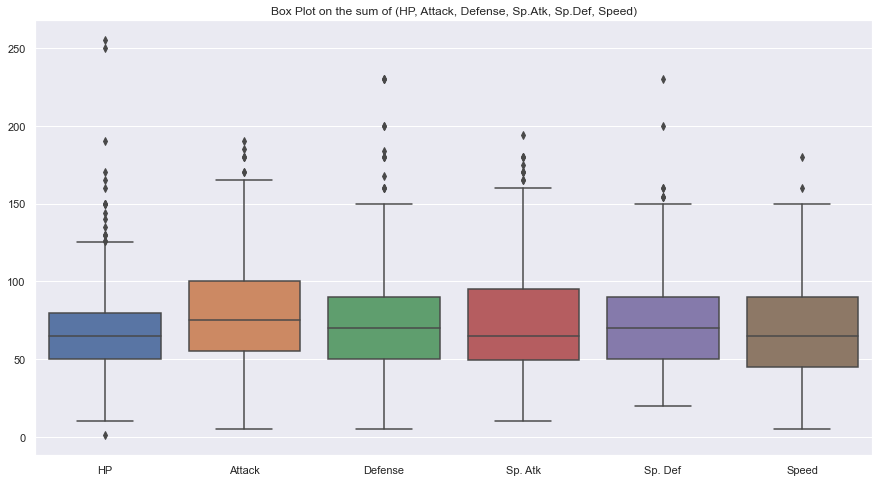

In [8]:
plt.figure(figsize=(15,8))
dfCopy = df.drop(['Total', 'Generation', 'Legendary'], axis=1)
sns.boxplot(data=dfCopy)
plt.title('Box Plot on the sum of (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed)')
plt.show()

# Attack Ratings   VS   Defense Ratings

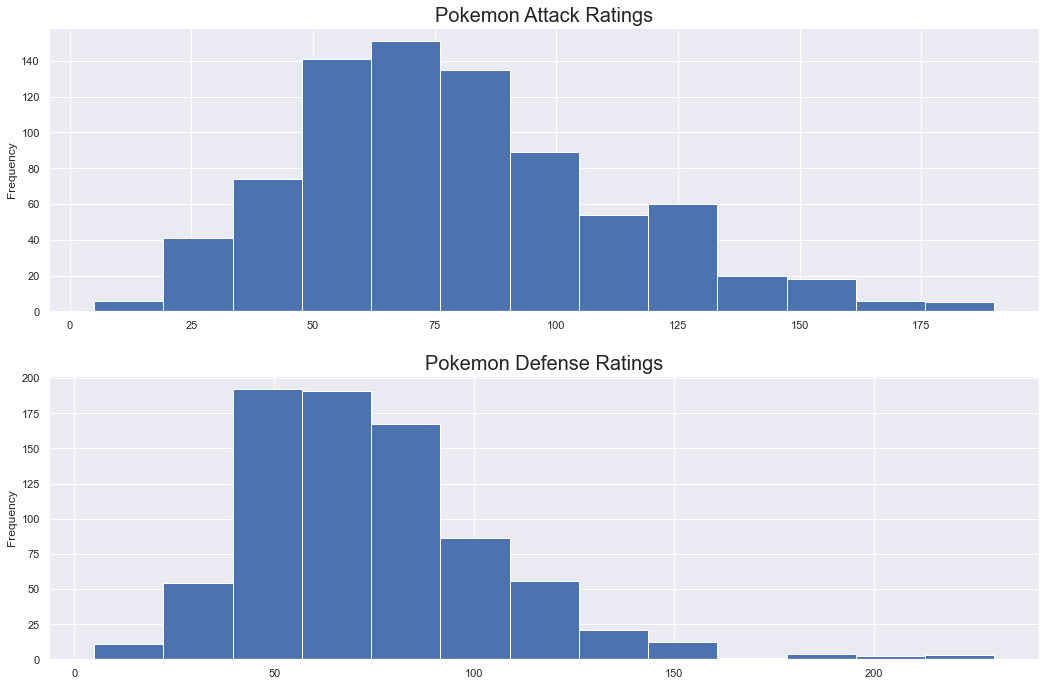

In [9]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(15, 10))
df['Attack'].plot.hist(ax=ax, bins=13)
ax.set_title('Pokemon Attack Ratings', size=20)
df['Defense'].plot.hist(ax=ax1, bins=13)
ax1.set_title('Pokemon Defense Ratings', size=20)
fig.tight_layout(pad=2.0)
plt.show()

# Compare by the type

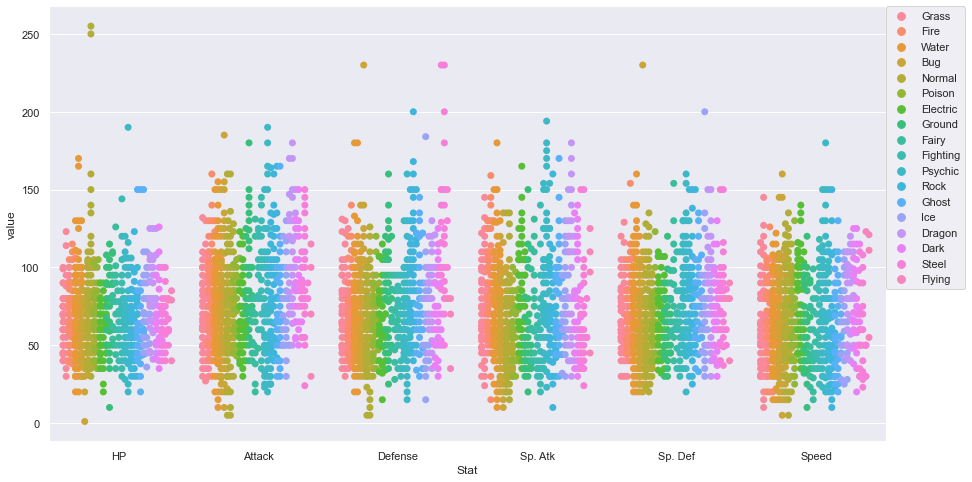

In [10]:
df_ = df_.drop(['#', 'Total', 'Generation', 'Legendary'], axis=1)
df_ = pd.melt(df_, id_vars=['Name', "Type 1", "Type 2"], var_name="Stat")
plt.figure(figsize=(15,8))
sns.swarmplot(x="Stat", y="value", data=df_, hue="Type 1", dodge=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()